In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

Generate Synthetic data

In [2]:
# Generate Data 1: Few large, well-separated, roughly spherical clusters
X1, y1 = make_blobs(n_samples=500, centers=4, cluster_std=1.5, random_state=42)

# Generate Data 2: Natural well-separated groups
X2, y2 = make_moons(n_samples=500, noise=0.05, random_state=42)

Viz data

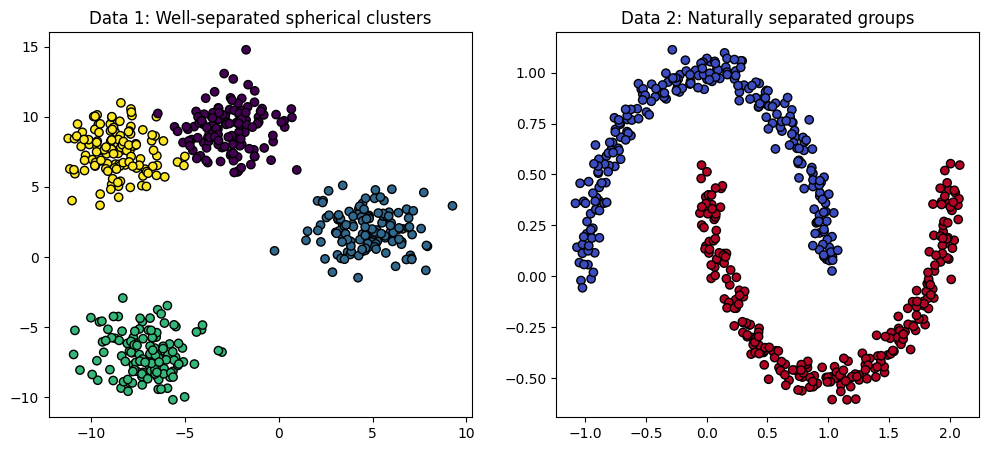

In [3]:
# Plot Data 1
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='viridis', edgecolors='k')
plt.title("Data 1: Well-separated spherical clusters")

# Plot Data 2
plt.subplot(1, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='coolwarm', edgecolors='k')
plt.title("Data 2: Naturally separated groups")

plt.show()

In [9]:
def generate_data():
    # Data 1: Few large, well-separated clusters
    X1, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)
    X1_noise, _ = make_blobs(n_samples=100, centers=4, cluster_std=2.0, random_state=42)  # Adding noise by increasing std
    
    # Data 2: Natural well-separated groups
    X2, _ = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                                n_clusters_per_class=1, n_classes=3, random_state=42)
    X2_noise = X2 + np.random.normal(0, 0.5, X2.shape)  # Adding noise manually
    
    return X1, X1_noise, X2, X2_noise

def plot_data(X1, X1_noise, X2, X2_noise):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    datasets = [(X1, 'Few Large, Well-Separated Clusters'),
                (X1_noise, 'Few Large, Well-Separated Clusters with Noise'),
                (X2, 'Natural Well-Separated Groups'),
                (X2_noise, 'Natural Well-Separated Groups with Noise')]
    
    for ax, (X, title) in zip(axes.flat, datasets):
        ax.scatter(X[:, 0], X[:, 1], alpha=0.7, edgecolors='k')
        ax.set_title(title)
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
    
    plt.tight_layout()
    plt.show()

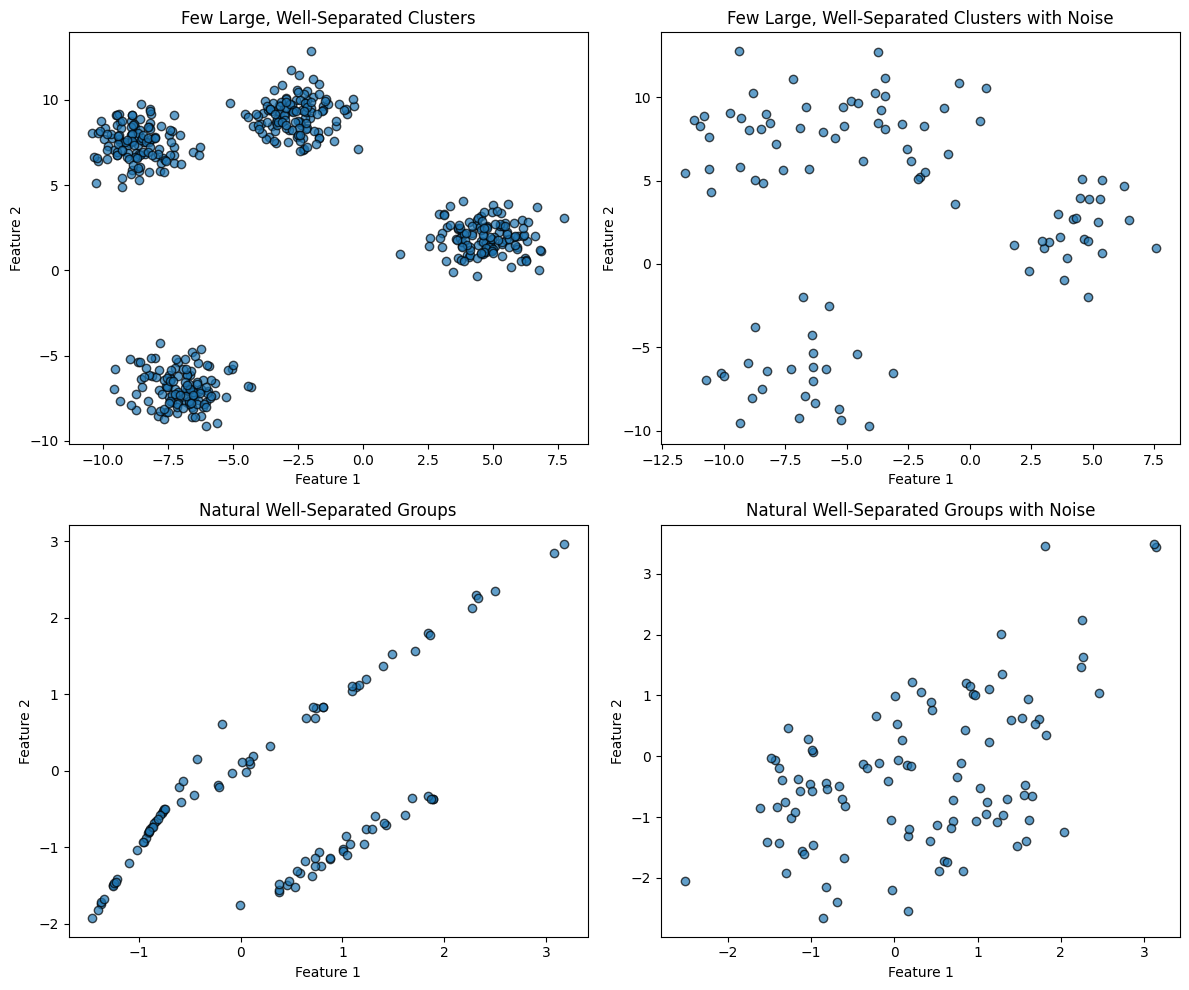

In [10]:
if __name__ == "__main__":
    X1, X1_noise, X2, X2_noise = generate_data()
    plot_data(X1, X1_noise, X2, X2_noise)

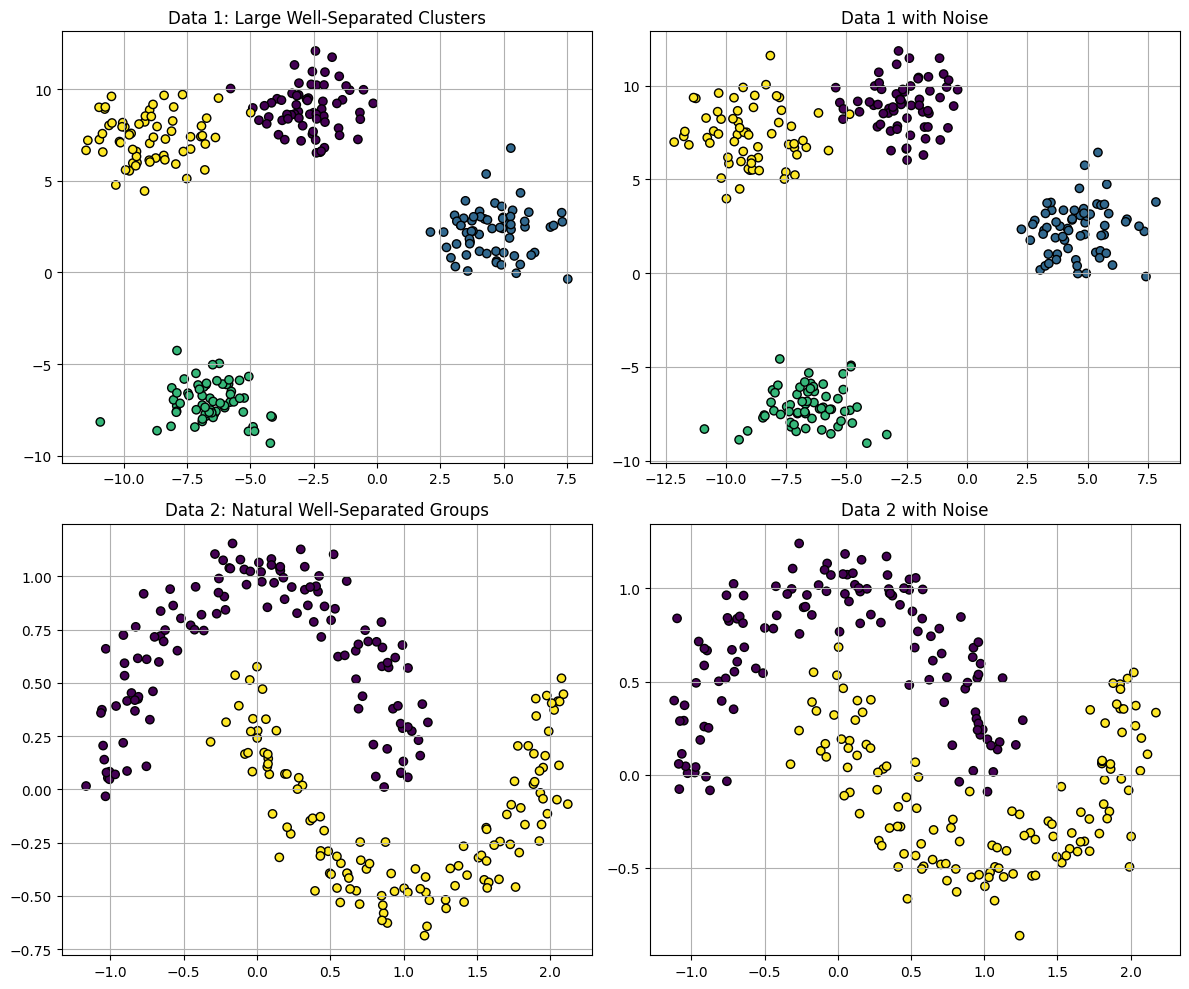

In [25]:
# Set random seed for reproducibility
np.random.seed(42)

# Function to add Gaussian noise
def add_gaussian_noise(data, mean=0, std=0.2):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

# Generate Data 1: Few large, well-separated clusters (spherical, convex)
data1, labels1 = make_blobs(n_samples=250, centers=4, cluster_std=1.25, random_state=42)

# Generate Data 1 with Gaussian Noise
data1_noisy = add_gaussian_noise(data1, std=0.5)

# Generate Data 2: Naturally well-separated groups (e.g., moons dataset)
data2, labels2 = make_moons(n_samples=250, noise=0.1, random_state=42)

# Generate Data 2 with Gaussian Noise
data2_noisy = add_gaussian_noise(data2, std=0.1)

# Plotting the datasets
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
datasets = [(data1, labels1, "Data 1: Large Well-Separated Clusters"),
            (data1_noisy, labels1, "Data 1 with Noise"),
            (data2, labels2, "Data 2: Natural Well-Separated Groups"),
            (data2_noisy, labels2, "Data 2 with Noise")]

for ax, (data, labels, title) in zip(axes.flat, datasets):
    ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k')
    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [26]:
# Function to perform hierarchical clustering and plot dendrogram
def plot_dendrogram(data, title):
    linked = linkage(data, method='ward')  # Ward's method for minimizing variance
    plt.figure(figsize=(8, 5))
    dendrogram(linked)
    plt.title(title)
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()
    
    # Finding the optimal number of clusters using the elbow method
    max_d = linked[-4, 2]  # Approximate optimal cut using last few merges
    clusters = fcluster(linked, max_d, criterion='distance')
    optimal_clusters = len(set(clusters))
    print(f"Optimal cluster count for {title}: {optimal_clusters}")

# Function to perform agglomerative clustering and determine cluster count
def agglomerative_clustering(data, title):
    model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
    model.fit(data)
    
    # Generate dendrogram
    linked = linkage(data, method='ward')
    plt.figure(figsize=(8, 5))
    dendrogram(linked)
    plt.title(title + " (Agglomerative Clustering)")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()
    
    # Find optimal number of clusters
    max_d = linked[-4, 2]
    clusters = fcluster(linked, max_d, criterion='distance')
    optimal_clusters = len(set(clusters))
    print(f"Optimal cluster count for {title} (Agglomerative): {optimal_clusters}")

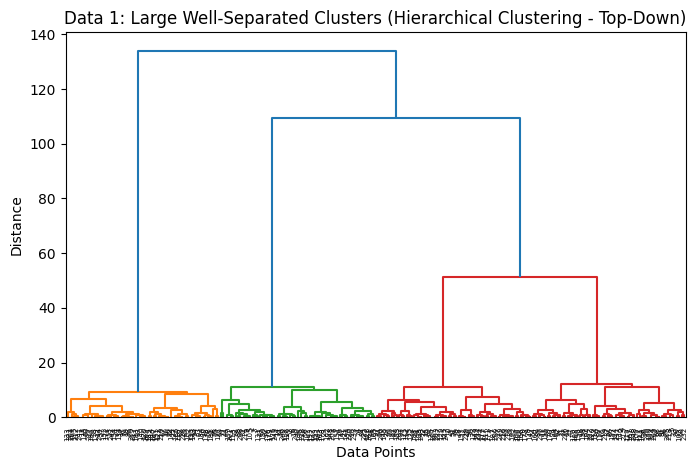

Optimal cluster count for Data 1: Large Well-Separated Clusters (Hierarchical Clustering - Top-Down): 4


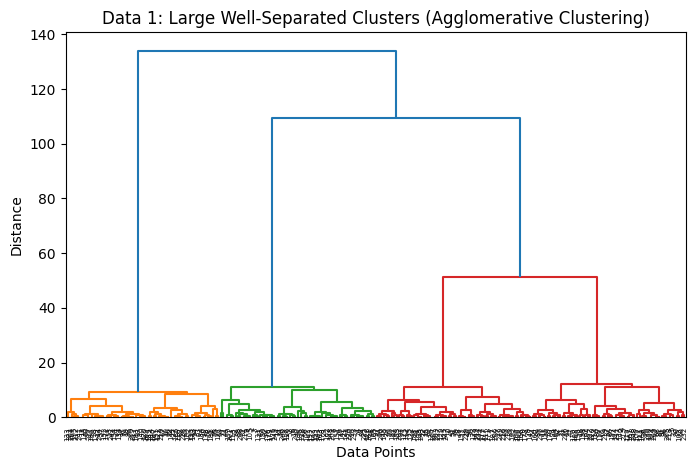

Optimal cluster count for Data 1: Large Well-Separated Clusters (Agglomerative): 4


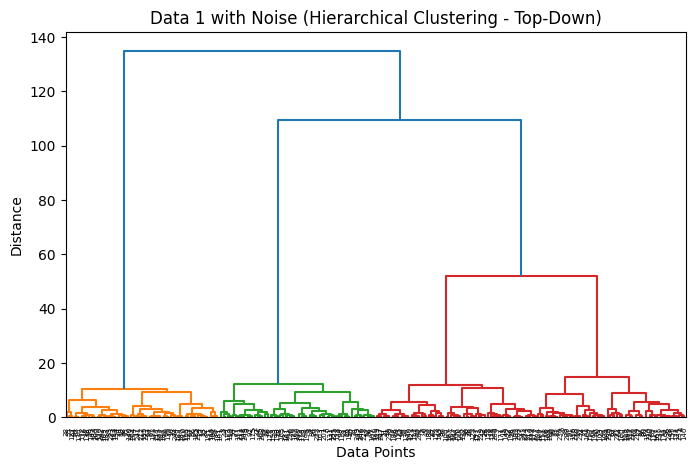

Optimal cluster count for Data 1 with Noise (Hierarchical Clustering - Top-Down): 4


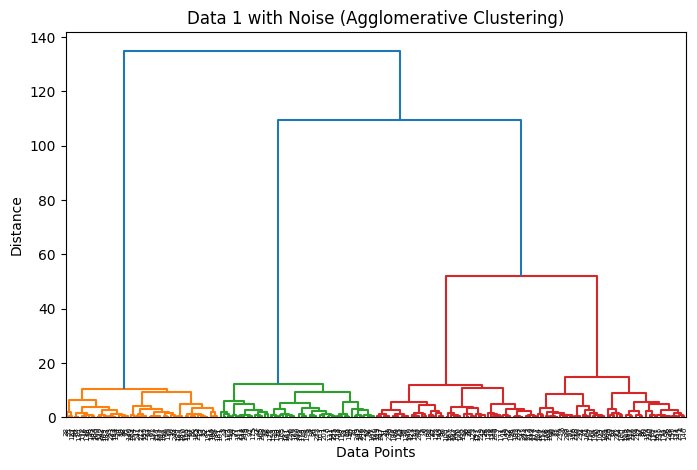

Optimal cluster count for Data 1 with Noise (Agglomerative): 4


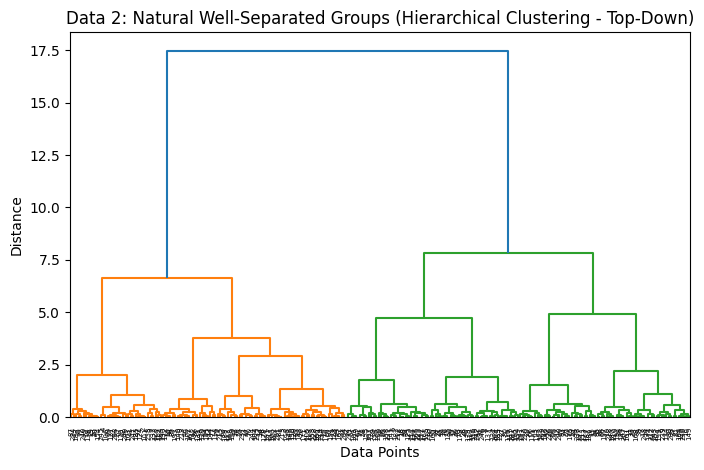

Optimal cluster count for Data 2: Natural Well-Separated Groups (Hierarchical Clustering - Top-Down): 4


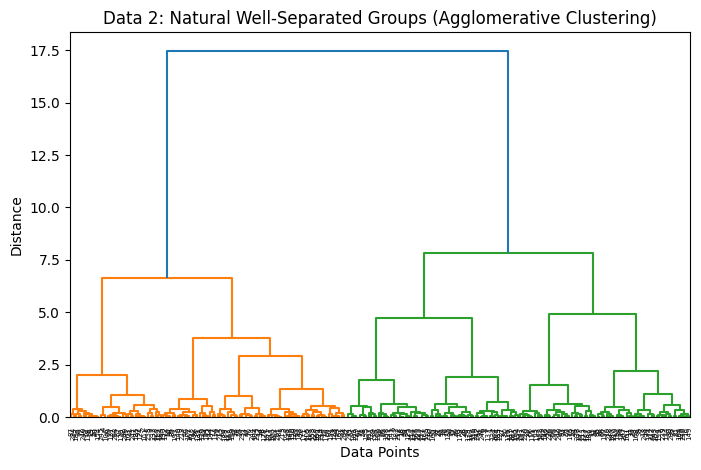

Optimal cluster count for Data 2: Natural Well-Separated Groups (Agglomerative): 4


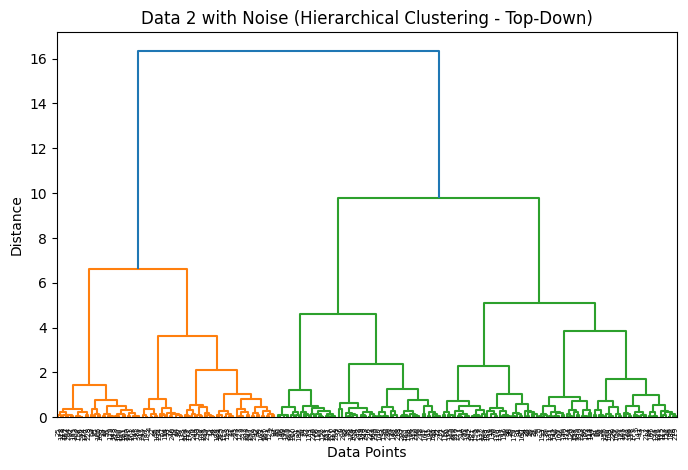

Optimal cluster count for Data 2 with Noise (Hierarchical Clustering - Top-Down): 4


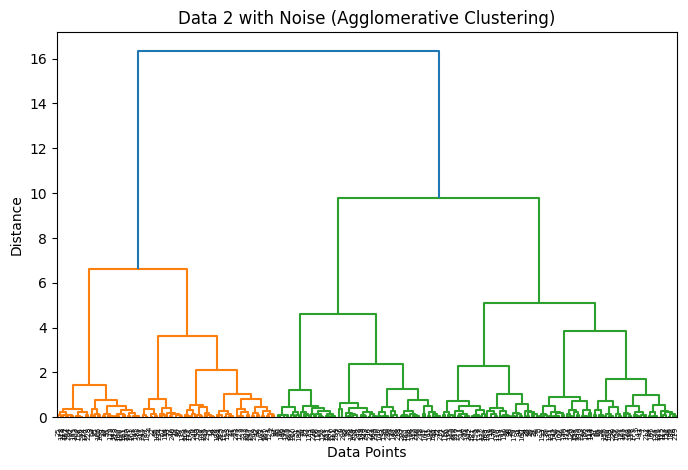

Optimal cluster count for Data 2 with Noise (Agglomerative): 4


In [28]:
# Running hierarchical and agglomerative clustering on each dataset
datasets = [
    (data1, "Data 1: Large Well-Separated Clusters"),
    (data1_noisy, "Data 1 with Noise"),
    (data2, "Data 2: Natural Well-Separated Groups"),
    (data2_noisy, "Data 2 with Noise")
]

for data, title in datasets:
    plot_dendrogram(data, title + " (Hierarchical Clustering - Top-Down)")
    agglomerative_clustering(data, title)